In [22]:
import pandas as pd
import numpy as np 

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_json('data.json')
df

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,# Bayesian inference and forecast of COVID-19\...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,# COVID-19_TRACKER_HTML_CSS_JAVASCRIPT\nCOVID-...
2,joanby/covid19,HTML,
3,sambreen27/covid19,JavaScript,A simple ReactJS app that displays latest stat...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,# ⚠ This Code is Archived. 더이상 유지보수하지 않습니다.\n2...
...,...,...,...
198,covidcaremap/covid19-healthsystemcapacity,HTML,[![Gitter](https://badges.gitter.im/covid19-he...
199,k-sys/covid-19,Jupyter Notebook,
200,google/exposure-notifications-verification-server,Go,# Archive status announcement\n\nThe Exposure ...
201,github/covid-19-repo-data,None,[![Actions Status](https://github.com/github/c...


In [34]:
df = df[df['readme_contents'] != '']

In [35]:
def basic_clean(string):
    '''
    This function takes in the original text.
    The text is all lowercased, 
    the text is encoded in ascii and any characters that are not ascii are ignored.
    The text is then decoded in utf-8 and any characters that are not ascii are ignored
    Additionally, special characters are all removed.
    A clean article is then returned
    '''
    #lowercase
    string = string.lower()
    
    #normalize
    string = unicodedata.normalize('NFKD', string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8', 'ignore')
    
    #remove special characters and replaces it with blank
    string = re.sub(r"[^a-z0-9'\s]", '', string)
    
    return string

def tokenize(string):
    '''
    This function takes in a string
    and returns the string as individual tokens put back into the string
    '''
    #create the tokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()

    #use the tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string


def stem(string):
    '''
    This function takes in text
    and returns the stem word joined back into the text
    '''
    #create porter stemmer
    ps = nltk.porter.PorterStemmer()
    
    #use the stem, split string using each word
    stems = [ps.stem(word) for word in string.split()]
    
    #join stem word to string
    string = ' '.join(stems)

    return string

def lemmatize(string):
    '''
    This function takes in a string
    and returns the lemmatized word joined back into the string
    '''
    #create the lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    #look at the article 
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    #join lemmatized words into article
    string = ' '.join(lemmas)

    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in text, extra words and exclude words
    and returns a list of text with stopword removed
    '''
    #create stopword list
    stopword_list = stopwords.words('english')
    
    #remove excluded words from list
    stopword_list = set(stopword_list) - set(exclude_words)
    
    #add the extra words to the list
    stopword_list = stopword_list.union(set(extra_words))
    
    #split the string into different words
    words = string.split()
    
    #create a list of words that are not in the list
    filtered_words = [word for word in words if word not in stopword_list]
    
    #join the words that are not stopwords (filtered words) back into the string
    string = ' '.join(filtered_words)
    
    return string

def prep_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    
    #chain together clean, tokenize, remove stopwords
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    #chain clean, tokenize, stem, remove stopwords
    df['stemmed'] = df['clean'].apply(stem)
    
    #clean clean, tokenize, lemmatize, remove stopwords
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    return df[['repo', 'language', 'clean', 'stemmed', 'lemmatized']]

In [36]:
df = prep_data(df, 'readme_contents')
df

,repo,language,clean,stemmed,lemmatized
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,bayesian inference forecast covid19 documentat...,bayesian infer forecast covid19 document statu...,bayesian inference forecast covid19 documentat...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...
3,sambreen27/covid19,JavaScript,simple reactjs app displays latest stats covid...,simpl reactj app display latest stat covid19 i...,simple reactjs app display latest stats covid1...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,code archived 2021 9 22 koreacovid19remainingv...,code archiv 2021 9 22 koreacovid19remainingvac...,code archived 2021 9 22 koreacovid19remainingv...
5,covid-19-net/covid-19-community,Jupyter Notebook,covid19community project community effort buil...,covid19commun project commun effort build neo4...,covid19community project community effort buil...
...,...,...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,Kotlin,sonar colocate android license mithttpsimgshie...,sonar coloc android licens mithttpsimgshieldsi...,sonar colocate android license mithttpsimgshie...
198,covidcaremap/covid19-healthsystemcapacity,HTML,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...
200,google/exposure-notifications-verification-server,Go,archive status announcement exposure notificat...,archiv statu announc exposur notif server proj...,archive status announcement exposure notificat...
201,github/covid-19-repo-data,None,actions statushttpsgithubcomgithubcovid19repod...,action statushttpsgithubcomgithubcovid19repoda...,action statushttpsgithubcomgithubcovid19repoda...


In [37]:
def seperate_language(df):
    
    desired_languages = ['Python', 'JavaScript', 'Jupyter Notebook', 'HTML', 'R']

    mask = df['language'].isin(desired_languages)

    df['language'] = pd.np.where(mask, df['language'], 'others')

    return df

In [38]:
desired_languages = ['Python', 'JavaScript', 'Jupyter Notebook', 'HTML', 'R']

mask = df['language'].isin(desired_languages)

df['language'] = pd.np.where(mask, df['language'], 'others')

df

,repo,language,clean,stemmed,lemmatized
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,bayesian inference forecast covid19 documentat...,bayesian infer forecast covid19 document statu...,bayesian inference forecast covid19 documentat...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...
3,sambreen27/covid19,JavaScript,simple reactjs app displays latest stats covid...,simpl reactj app display latest stat covid19 i...,simple reactjs app display latest stats covid1...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,code archived 2021 9 22 koreacovid19remainingv...,code archiv 2021 9 22 koreacovid19remainingvac...,code archived 2021 9 22 koreacovid19remainingv...
5,covid-19-net/covid-19-community,Jupyter Notebook,covid19community project community effort buil...,covid19commun project commun effort build neo4...,covid19community project community effort buil...
...,...,...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,others,sonar colocate android license mithttpsimgshie...,sonar coloc android licens mithttpsimgshieldsi...,sonar colocate android license mithttpsimgshie...
198,covidcaremap/covid19-healthsystemcapacity,HTML,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...
200,google/exposure-notifications-verification-server,others,archive status announcement exposure notificat...,archiv statu announc exposur notif server proj...,archive status announcement exposure notificat...
201,github/covid-19-repo-data,others,actions statushttpsgithubcomgithubcovid19repod...,action statushttpsgithubcomgithubcovid19repoda...,action statushttpsgithubcomgithubcovid19repoda...


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [48]:
def tts(df, stratify=None):
    train_validate, test=train_test_split(df,
                                         train_size=.7,
                                         random_state=8675309,
                                         stratify=None)
    
    train, validate = train_test_split(train_validate,
                                      test_size=.3, 
                                      random_state=8675309,
                                      stratify=None)
    
    return train, validate, test

In [50]:
train, validate, test = tts(df, stratify = 'language')

In [52]:
train

,repo,language,clean,stemmed,lemmatized
77,wal33d006/novel_covid_19,JavaScript,novel covid 19 stats covid19 statistics flutte...,novel covid 19 stat covid19 statist flutter ap...,novel covid 19 stats covid19 statistic flutter...
133,DataHerb/dataset-covid-19,others,datasetcovid19,datasetcovid19,datasetcovid19
193,Institut-Zdravotnych-Analyz/covid19-data,others,covid19data open data sets related covid19 pan...,covid19data open data set relat covid19 pandem...,covid19data open data set related covid19 pand...
66,closedloop-ai/cv19index,Python,join us webinarhttpsclosedloopaicv19indexwebin...,join us webinarhttpsclosedloopaicv19indexwebin...,join u webinarhttpsclosedloopaicv19indexwebina...
99,reustle/covid19japan,JavaScript,covid19japancom community powered covid19 coro...,covid19japancom commun power covid19 coronavir...,covid19japancom community powered covid19 coro...
...,...,...,...,...,...
134,abuanwar072/Covid-19-Flutter-UI,others,covid19 flutter ui watch youtubehttpsyoutubezx...,covid19 flutter ui watch youtubehttpsyoutubezx...,covid19 flutter ui watch youtubehttpsyoutubezx...
114,turicas/covid19-br,Python,portuguesreadmemd covid19br pytestdockerhttpsg...,portuguesreadmemd covid19br pytestdockerhttpsg...,portuguesreadmemd covid19br pytestdockerhttpsg...
127,trekhleb/covid-19,JavaScript,coronavirus covid19 dashboard coronavirus covi...,coronaviru covid19 dashboard coronaviru covid1...,coronavirus covid19 dashboard coronavirus covi...
155,ieee8023/covid-chestxray-dataset,Jupyter Notebook,note please claim diagnostic performance model...,note pleas claim diagnost perform model withou...,note please claim diagnostic performance model...


In [53]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [59]:
others_words = clean(' '.join(train[train.language == 'others'].lemmatized))
python_words = clean(' '.join(train[train.language == 'Python'].lemmatized))
all_words = clean(' '.join(train.lemmatized))

In [60]:
others_words

['datasetcovid19',
 'covid19data',
 'open',
 'data',
 'set',
 'related',
 'covid19',
 'pandemic',
 'slovakia',
 'provided',
 'moh',
 'slovakia',
 'strongapi',
 'access',
 'datastrong',
 'br',
 'team',
 'hrefhttpsslovenskohelpslovenskohelpa',
 'prepared',
 'documented',
 'central',
 'datapoint',
 'database',
 'accessible',
 'via',
 'api',
 'access',
 'hrefhttpsdatakoronagovskdatakoronagovska',
 'contribute',
 'open',
 'source',
 'project',
 'hrefhttpsgithubcomslovenskohelpdatakoronaherea',
 'kudos',
 'strongsources',
 'datastrong',
 'case',
 'hospital',
 'data',
 'hospital',
 'capacity',
 'nczi',
 'sk',
 'wwwnczisksk',
 'epidemiological',
 'data',
 'uvz',
 'sr',
 'httpswwwuvzsrsk',
 'confirmed',
 'death',
 'udzs',
 'sr',
 'httpwwwudzssksk',
 'nationwide',
 'antigen',
 'testing',
 'data',
 'mod',
 'slovakia',
 'httpswwwmosrsk',
 'ambulance',
 'data',
 'zzs',
 'httpswww155sk',
 'strongofficial',
 'useful',
 'source',
 'recommend',
 'monitoringstrong',
 'official',
 'covid',
 'information'

In [61]:
other_freq = pd.Series(others_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [68]:
word_counts = (pd.concat([all_freq, other_freq, python_freq], axis=1, sort=True)
                .set_axis(['all', 'other', 'python'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,other,python
0,196,10,21
00,38,0,0
000,1,0,1
0000,4,0,0
0008979,1,0,1


In [75]:
word_counts = word_counts[word_counts['all'] != 1]

In [76]:
word_counts.sort_values(by='all', ascending=True).head(10)


,all,other,python
zyngausfulltimeullinew,2,2,0
easiest,2,0,1
raaz,2,0,0
rank,2,2,0
dylan,2,1,0
dwivedi,2,0,0
rateth,2,0,2
duplicated,2,0,2
duplicate,2,0,0
duong,2,0,0


In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
(word_counts
 [(word_counts.other > 10) & (word_counts.python > 10)]
 .assign(ratio=lambda df: df.other / (df.python + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,other,python,ratio
run,97,11,38,0.289398
python,94,19,57,0.333275
9,97,21,60,0.349942
model,136,29,62,0.467667
value,40,11,22,0.499773
project,155,88,17,5.173427
open,101,64,11,5.812897
1,263,174,28,6.212067
covid19,650,408,65,6.275958
coronavirus,229,182,14,12.990721


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

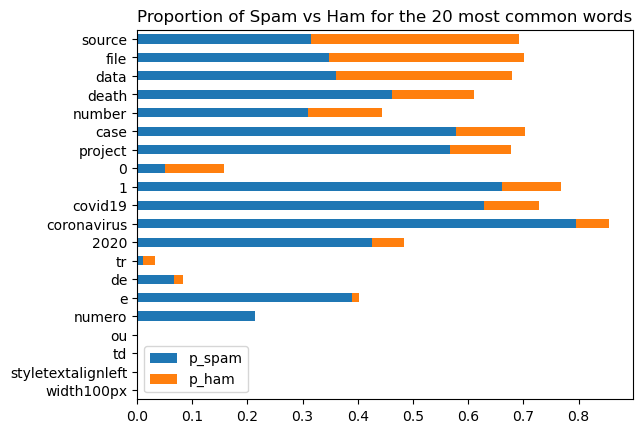

In [80]:
(word_counts
 .assign(p_spam=word_counts.other / word_counts['all'],
         p_ham=word_counts.python / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df

,repo,language,clean,stemmed,lemmatized
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,bayesian inference forecast covid19 documentat...,bayesian infer forecast covid19 document statu...,bayesian inference forecast covid19 documentat...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...,covid19trackerhtmlcssjavascript covid19 html5 ...
3,sambreen27/covid19,JavaScript,simple reactjs app displays latest stats covid...,simpl reactj app display latest stat covid19 i...,simple reactjs app display latest stats covid1...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,code archived 2021 9 22 koreacovid19remainingv...,code archiv 2021 9 22 koreacovid19remainingvac...,code archived 2021 9 22 koreacovid19remainingv...
5,covid-19-net/covid-19-community,Jupyter Notebook,covid19community project community effort buil...,covid19commun project commun effort build neo4...,covid19community project community effort buil...
...,...,...,...,...,...
197,nihp-public/COVID-19-app-Android-BETA,others,sonar colocate android license mithttpsimgshie...,sonar coloc android licens mithttpsimgshieldsi...,sonar colocate android license mithttpsimgshie...
198,covidcaremap/covid19-healthsystemcapacity,HTML,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...,gitterhttpsbadgesgitterimcovid19healthsystemca...
200,google/exposure-notifications-verification-server,others,archive status announcement exposure notificat...,archiv statu announc exposur notif server proj...,archive status announcement exposure notificat...
201,github/covid-19-repo-data,others,actions statushttpsgithubcomgithubcovid19repod...,action statushttpsgithubcomgithubcovid19repoda...,action statushttpsgithubcomgithubcovid19repoda...


In [82]:
X = df.lemmatized
y = df.language
X_train, X_test, y_train, y_test = \
train_test_split(X, y, 
                 test_size=0.2, 
                 random_state=1349)

In [83]:
X_train.head()

107    covid19 datasets apis list project vision deve...
182    output githubdocument readmemd generated readm...
32     android kotlinmvvmcovid19 repository contains ...
120    h1 aligncentercovid severity forecastingh1 p a...
174    autogenerated content please send request covi...
Name: lemmatized, dtype: object

In [84]:
y_train.head()

107                HTML
182                   R
32               others
120    Jupyter Notebook
174              others
Name: language, dtype: object

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_bow = cv.fit_transform(X_train)
tree = DecisionTreeClassifier(max_depth=25)
tree.fit(X_bow, y_train)
tree.score(X_bow, y_train)

1.0

In [93]:
X_test_bow = cv.transform(X_test)
tree.score(X_test_bow, y_test)

0.3

In [94]:
pd.Series(
    dict(
    zip(cv.get_feature_names_out(), 
    tree.feature_importances_))).sort_values().tail()

prediction    0.029979
science       0.031584
health        0.040379
npm           0.040723
python        0.079947
dtype: float64

In [95]:
y_pred = cv.predict(X_train)
y_pred[0:5]

AttributeError: 'CountVectorizer' object has no attribute 'predict'